In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.utils import resample
# Reading in csv
df = pd.read_csv('final_data_2.csv')

# Data cleaning
def clean_numeric(val):
    if isinstance(val, str):
        if val.strip() == 'Computation time out':
            return np.nan
        try:
            return float(val)
        except ValueError:
            return np.nan
    return val

# Apply cleaning to all columns except 'Adjacency Matrix'
for col in df.columns:
    if col != 'Adjacency Matrix':
        df[col] = df[col].apply(clean_numeric)

# Drop columns with NaN values
df = df.dropna(axis=1)



# Separate features and target


df_majority = df[df['Binary Resistance Curvature'] == 0]
df_minority = df[df['Binary Resistance Curvature'] == 1]
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=len(df_minority), 
                                   random_state=42)  

df_balanced = pd.concat([df_minority, df_majority_downsampled])

X = df_balanced.drop(['Binary Resistance Curvature', 'Adjacency Matrix', 
             'Number of 3-gons', 'Number of 4-gons', 'Number of 5-gons', 
             'Number of 6-gons', 'Number of 7-gons', 'Number of 8-gons', 
             'Number of 9-gons', 'Number of 10-gons', 'Number of 11-gons', 
             'Number of 12-gons'], axis=1)
y = df_balanced['Binary Resistance Curvature']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)
print(np.mean(y_train),np.mean(y_test))
print(len(y_train),len(y_test))
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

torch.set_default_dtype(torch.float64)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
X_train_tensor = torch.tensor(X_train)
X_test_tensor = torch.tensor(X_test)
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

X_train_tensor = X_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

dataset = {
    'train_input': X_train_tensor,      
    'train_label': y_train_tensor,      
    'test_input': X_test_tensor,        
    'test_label': y_test_tensor 
}

0.4874476987447699 0.55
478 120
cpu


In [2]:
#Define the accuracy score
from sklearn.metrics import accuracy_score
import torch

def calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test, threshold=0.5):
    train_predict = torch.argmax(model.forward(X_train_tensor).detach(),dim=1)
    print(train_predict)
    train_accuracy = accuracy_score(train_predict, y_train)
    test_predict = torch.argmax(model.forward(X_test_tensor).detach(),dim=1)
    test_accuracy = accuracy_score(test_predict, y_test)
    return train_accuracy, test_accuracy


In [15]:
def train_acc():
    preds = torch.argmax(model(dataset['train_input']), dim=1)
    return torch.mean((preds == dataset['train_label']).float())
def test_acc():
    preds = torch.argmax(model(dataset['test_input']), dim=1)
    return torch.mean((preds == dataset['test_label']).float())
model = KAN(width=[29,2], grid=3, k=3, seed=42, device=device)
result=model.fit(dataset, opt="LBFGS", steps=100,lamb=0.001, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
train, test = calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.77e-01 | test_loss: 1.61e-01 | reg: 1.79e+01 | : 100%|█| 100/100 [00:22<00:00,  4.37

saving model version 0.1
tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1

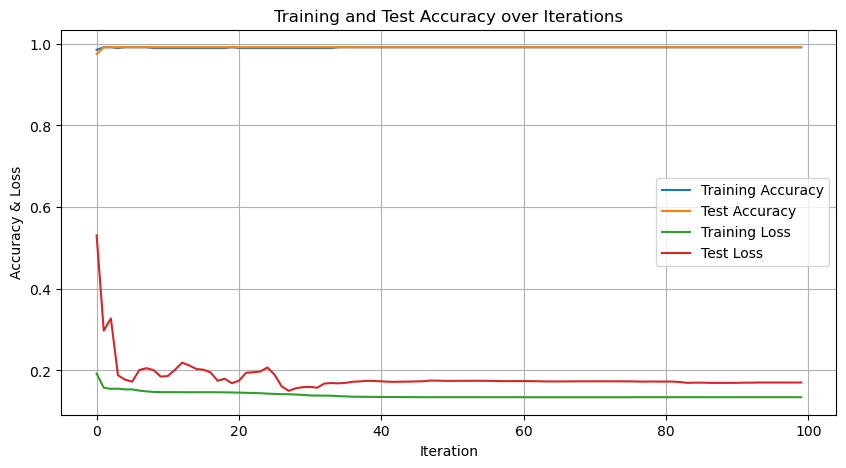

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(result["train_acc"], label='Training Accuracy')
plt.plot(result["test_acc"], label='Test Accuracy')
plt.plot(result["train_loss"], label='Training Loss')
plt.plot(result["test_loss"], label='Test Loss')
plt.title('Training and Test Accuracy over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy & Loss')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'feature attribution score')

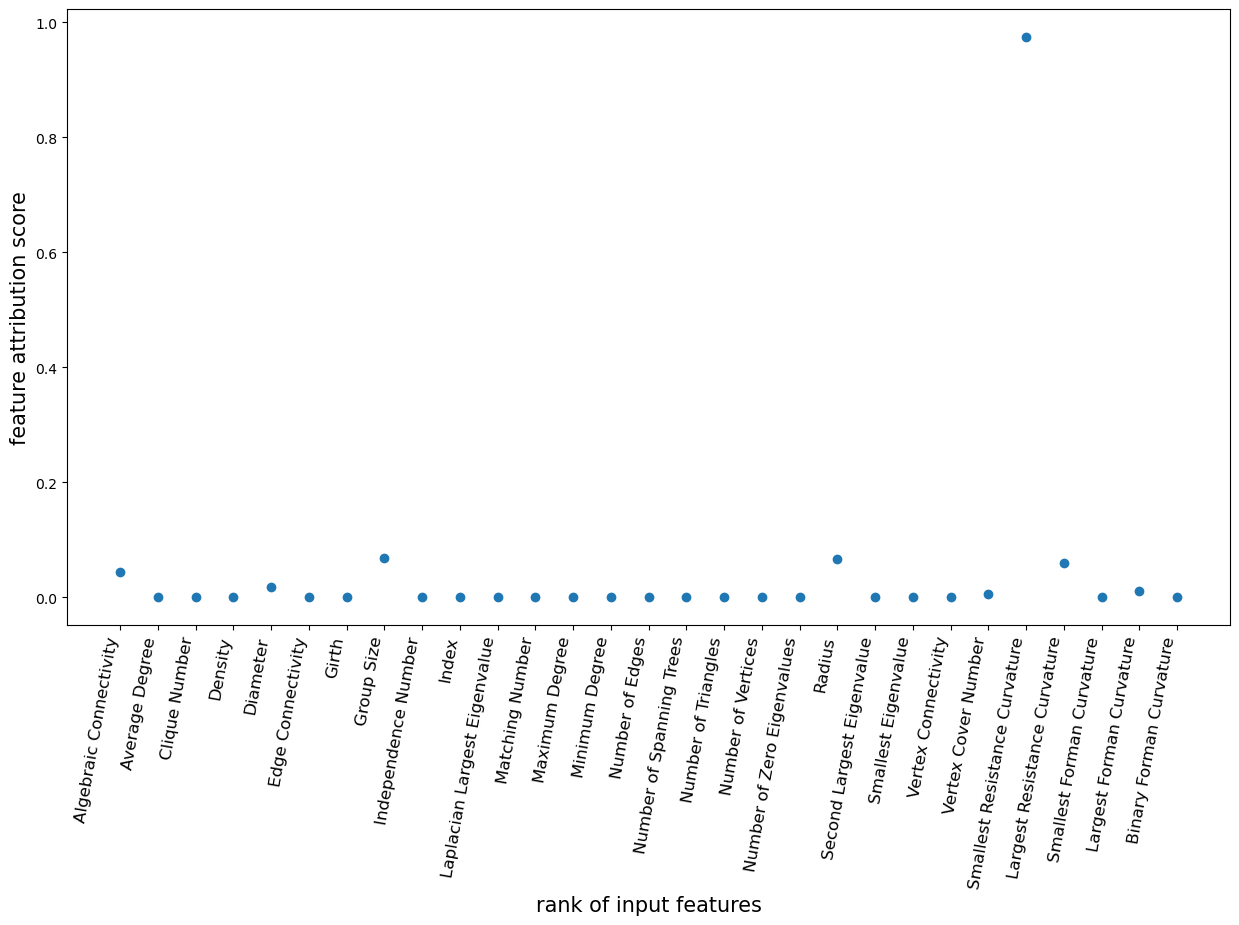

In [5]:
import matplotlib.pyplot as plt
feature_names = X.columns
plt.figure(figsize=(15, 8))
plt.scatter(np.arange(29)+1, model.feature_score.detach().numpy())
plt.xticks(ticks=np.arange(29) + 1, labels=feature_names, rotation=80, ha='right', fontsize=12)
plt.xlabel('Input Features', fontsize=15)
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

In [16]:

mode = "auto"
if mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
formula=model.symbolic_formula()
print(formula)
train, test = calculate_accuracy(model, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")

fixing (0,0,0) with x, r2=0.0014283232121568839, c=1
fixing (0,0,1) with x, r2=0.004360081607659133, c=1
fixing (0,1,0) with x, r2=0.02832077801486565, c=1
fixing (0,1,1) with x, r2=0.01329033933487277, c=1
fixing (0,2,0) with x^4, r2=0.9999998486157872, c=3
fixing (0,2,1) with x^2, r2=0.9999316113814996, c=2
fixing (0,3,0) with x, r2=0.008116220511238373, c=1
fixing (0,3,1) with x, r2=0.03147277960357027, c=1
fixing (0,4,0) with x, r2=0.017216460920062605, c=1
fixing (0,4,1) with x, r2=0.09221761910805727, c=1
fixing (0,5,0) with x, r2=0.9999571965114356, c=1
fixing (0,5,1) with exp, r2=1.0000000000000016, c=2
fixing (0,6,0) with x^4, r2=0.9999704293653138, c=3
fixing (0,6,1) with x^4, r2=0.9980311340298724, c=3
fixing (0,7,0) with x, r2=0.10173211379485775, c=1
fixing (0,7,1) with x, r2=0.21328990026083086, c=1
fixing (0,8,0) with x, r2=0.045814909313738265, c=1
fixing (0,8,1) with x, r2=0.02211381946013235, c=1
fixing (0,9,0) with x, r2=0.031826620973184304, c=1
fixing (0,9,1) with 

In [17]:
formula=model.symbolic_formula()
print(formula) 

([-1.03954440050879e-5*x_1 + 0.000138158363029441*x_10 + 0.00028800922060444*x_11 + 1.06402116304812e-6*x_12 + 2.62204696412909e-6*x_13 - 0.0502165106544519*x_15 + 0.0361617793162142*x_16 - 9.74587729891558e-6*x_17 - 5.5735699597547e-7*x_18 - 7.28728529746143e-5*x_19 - 0.000445860870113485*x_2 - 3.38222770555311e-5*x_20 - 0.000100056426049131*x_21 + 1.37267707280964e-7*x_22 + 1.50786803730488e-6*x_24 - 6.6372032026388e-7*x_26 + 0.000364679264968424*x_27 - 0.224499697189762*x_28 + 7.66268350945663e-7*x_4 - 0.00121576033601211*x_5 + 0.00109330927824909*x_6 - 0.0774269941536551*x_8 - 1.15528017125056e-5*x_9 + 6.10914127960039e-5*(0.255166656829431 - x_3)**4 - 2.51126977753452e-6*(0.274146341463415 - x_7)**4 - 4.36629580429339*(-x_25 - 0.868334114838655)**2 - 8.24316107984756e-15*exp(9.0*x_14) - 6.03203027065811e-23*exp(8.5*x_23) + 2.23851203620148e-17*exp(5.1444*x_29) + 10.8999447547539, 0.00266772281798744*x_1 - 0.000200954137646378*x_11 + 0.0129645614214547*x_12 + 1.85368515177636e-6*x_

Text(0, 0.5, 'feature attribution score')

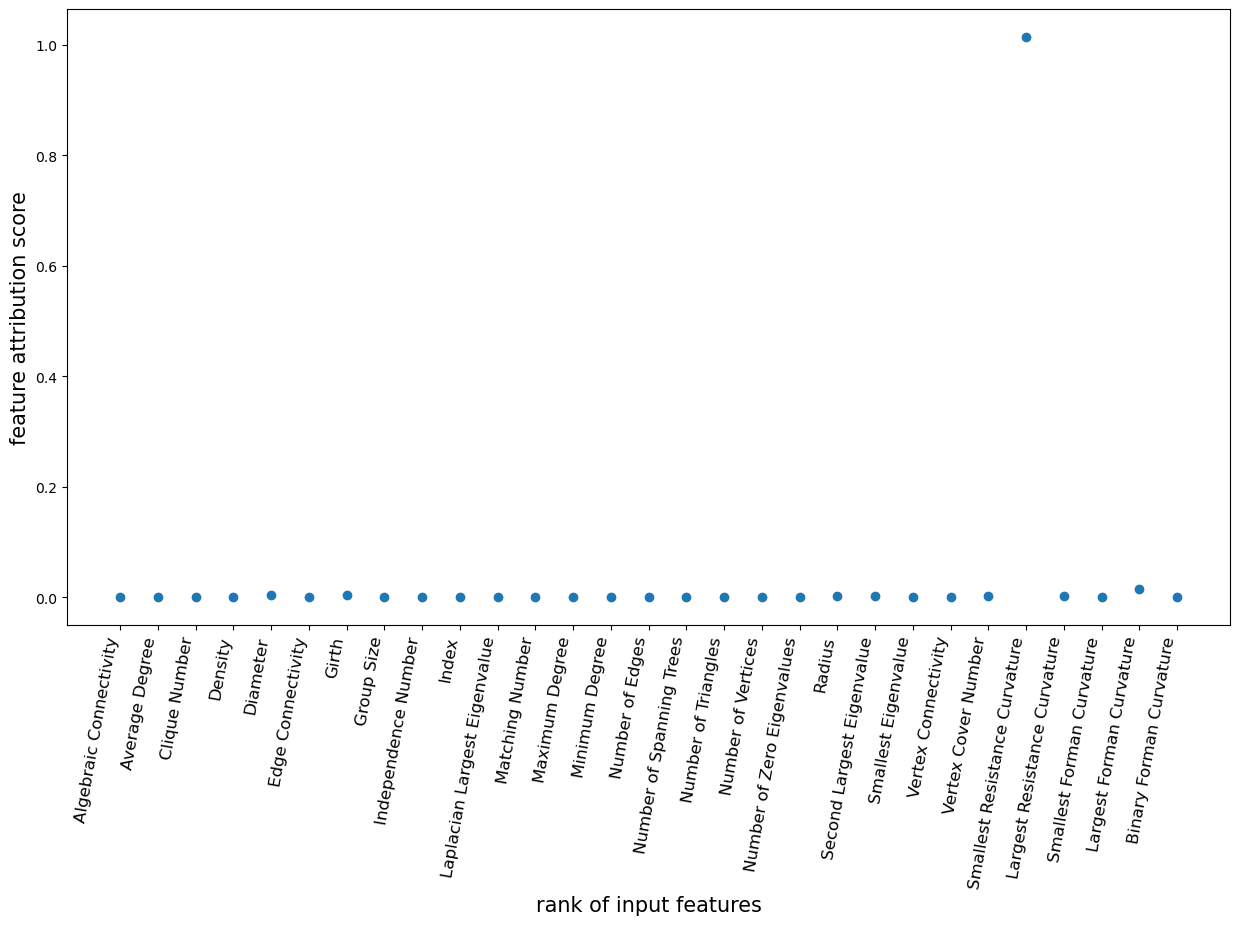

In [39]:
import matplotlib.pyplot as plt
feature_names = X.columns
plt.figure(figsize=(15, 8))
plt.scatter(np.arange(29)+1, model.feature_score.detach().numpy())
plt.xticks(ticks=np.arange(29) + 1, labels=feature_names, rotation=80, ha='right', fontsize=12)
plt.xlabel('Input Features', fontsize=15)
plt.xlabel('rank of input features', fontsize=15)
plt.ylabel('feature attribution score', fontsize=15)

## prune

In [20]:
a= KAN(width=[29,2], grid=3, k=3, seed=42, device=device)
result=a.fit(dataset, opt="LBFGS", steps=100,lamb=0.001, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())
train, test = calculate_accuracy(a, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")


checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.77e-01 | test_loss: 1.61e-01 | reg: 1.79e+01 | : 100%|█| 100/100 [00:22<00:00,  4.41

saving model version 0.1
tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1

In [25]:
a=a.prune()
train, test = calculate_accuracy(a, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")


saving model version 0.3
tensor([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1

In [26]:
mode = "auto"
if mode == "auto":
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    a.auto_symbolic(lib=lib)
formula=a.symbolic_formula()
print(formula)
train, test = calculate_accuracy(a, X_train_tensor, y_train, X_test_tensor, y_test)
print(f"Train Accuracy: {train}")
print(f"Test Accuracy: {test}")

fixing (0,0,0) with 0
fixing (0,0,1) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with 0
fixing (0,2,0) with 0
fixing (0,2,1) with 0
fixing (0,3,0) with 0
fixing (0,3,1) with 0
fixing (0,4,0) with 0
fixing (0,4,1) with 0
fixing (0,5,0) with 0
fixing (0,5,1) with 0
fixing (0,6,0) with 0
fixing (0,6,1) with 0
fixing (0,7,0) with 0
fixing (0,7,1) with x, r2=0.21328990026083086, c=1
fixing (0,8,0) with 0
fixing (0,8,1) with 0
fixing (0,9,0) with 0
fixing (0,9,1) with 0
fixing (0,10,0) with 0
fixing (0,10,1) with 0
fixing (0,11,0) with 0
fixing (0,11,1) with 0
fixing (0,12,0) with 0
fixing (0,12,1) with 0
fixing (0,13,0) with 0
fixing (0,13,1) with 0
fixing (0,14,0) with 0
fixing (0,14,1) with x, r2=0.021245641575338096, c=1
fixing (0,15,0) with 0
fixing (0,15,1) with 0
fixing (0,16,0) with 0
fixing (0,16,1) with 0
fixing (0,17,0) with 0
fixing (0,17,1) with 0
fixing (0,18,0) with 0
fixing (0,18,1) with 0
fixing (0,19,0) with 0
fixing (0,19,1) with 0
fixing (0,20,0) with 0
fixing (0,20,1) wi

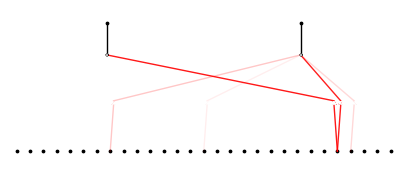

In [28]:
a.plot()